In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config lnlinebackend.figure_format = 'svg'

In [3]:
df = pd.read_csv(r"D:\Zhe\_data\kobe-bryant-shot-selection\data.csv")
df.shape

(30697, 25)

Text(0.5, 1.0, '投篮经纬度')

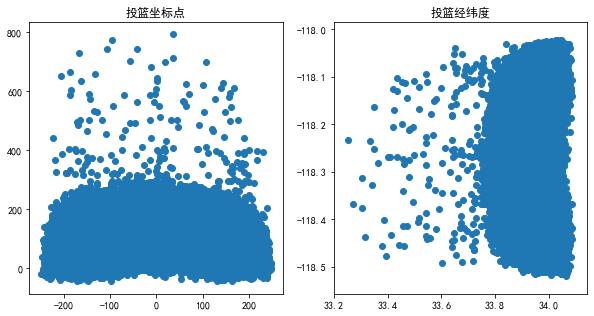

In [4]:
plt.figure(figsize=(5*2, 5))

axes1 = plt.subplot(1, 2, 1)
axes1.scatter(df["loc_x"], df["loc_y"])
axes1.set_title("投篮坐标点")

axes1 = plt.subplot(1, 2, 2)
axes1.scatter(df["lat"], df["lon"])
axes1.set_title("投篮经纬度")

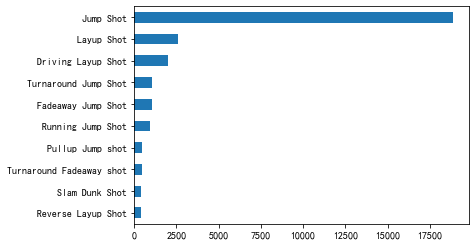

In [5]:
df["action_type"].value_counts().head(10)[::-1].plot.barh()

In [6]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

combined_shot_type
Bank Shot      120
Dunk          1056
Hook Shot      127
Jump Shot    19710
Layup         4532
Tip Shot       152
Name: shot_made_flag, dtype: int64

combined_shot_type
Bank Shot      95.0
Dunk          980.0
Hook Shot      68.0
Jump Shot    7708.0
Layup        2561.0
Tip Shot       53.0
Name: shot_made_flag, dtype: float64

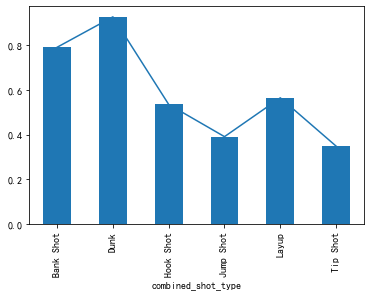

In [7]:
shot_sum = df.groupby('combined_shot_type')["shot_made_flag"].sum()

shot_count = df.groupby('combined_shot_type')["shot_made_flag"].count()
display(shot_count, shot_sum)

shot_rate = shot_sum / shot_count
shot_rate.plot()
shot_rate.plot.bar()

In [8]:
df["shot_zone_area"] = df["shot_zone_area"].factorize()[0]
df["shot_zone_basic"] = df["shot_zone_basic"].factorize()[0]
df["shot_zone_range"] = df["shot_zone_range"].factorize()[0]

In [9]:
plt.figure(figsize=(4*3, 4))
N = ["shot_zone_area", "shot_zone_basic", "shot_zone_range"]

<Figure size 864x288 with 0 Axes>

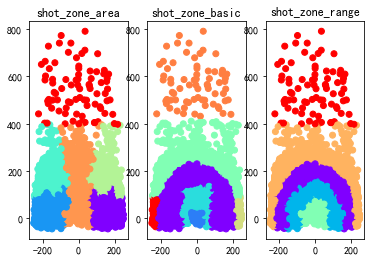

In [14]:
for k in range(3):
    
    col = N[k]
    axes = plt.subplot(1, 3, k+1)
    axes.scatter(df["loc_x"], df["loc_y"], c=df[col], cmap='rainbow')
    axes.set_title(col)

<BarContainer object of 7 artists>

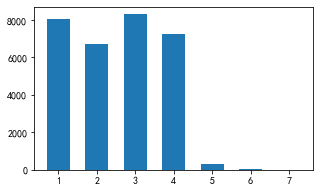

In [15]:
period = df.period.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(period.index, period.values, width=0.6)